# print("hello")

# Install Modules 

In [ ]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn

# Importing Modules

In [3]:
from sklearn.impute import KNNImputer  # type: ignore
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Loading DATA

In [4]:
path = r"./AirQualityUCI.csv"
data = pd.read_csv(path)
data_copy = data.copy()


# Replacing the missing values

In [5]:
# Drop 'Date' and 'Time' columns
data = data.drop(['Date', 'Time'], axis=1)

# Replace -200 with NaN
data.replace(-200, np.nan, inplace=True)

# Initialize KNNImputer with 5 neighbors
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the data
data.iloc[:, :] = imputer.fit_transform(data)

# Verify the changes
print(data.head())

   CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0     2.6       1360.0     150.0      11.9         1046.0    166.0   
1     2.0       1292.0     112.0       9.4          955.0    103.0   
2     2.2       1402.0      88.0       9.0          939.0    131.0   
3     2.2       1376.0      80.0       9.2          948.0    172.0   
4     1.6       1272.0      51.0       6.5          836.0    131.0   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
0        1056.0    113.0        1692.0       1268.0  13.6  48.9  0.7578  
1        1174.0     92.0        1559.0        972.0  13.3  47.7  0.7255  
2        1140.0    114.0        1555.0       1074.0  11.9  54.0  0.7502  
3        1092.0    122.0        1584.0       1203.0  11.0  60.0  0.7867  
4        1205.0    116.0        1490.0       1110.0  11.2  59.6  0.7888  


# Calculate the skewness of data

In [6]:
skew_data = data.skew()
skew_data

CO(GT)           1.427133
PT08.S1(CO)      0.751427
NMHC(GT)         1.401873
C6H6(GT)         1.335145
PT08.S2(NMHC)    0.548257
NOx(GT)          1.790538
PT08.S3(NOx)     1.116078
NO2(GT)          0.706228
PT08.S4(NO2)     0.200369
PT08.S5(O3)      0.615502
T                0.299141
RH              -0.034259
AH               0.253697
dtype: float64

# Histograms

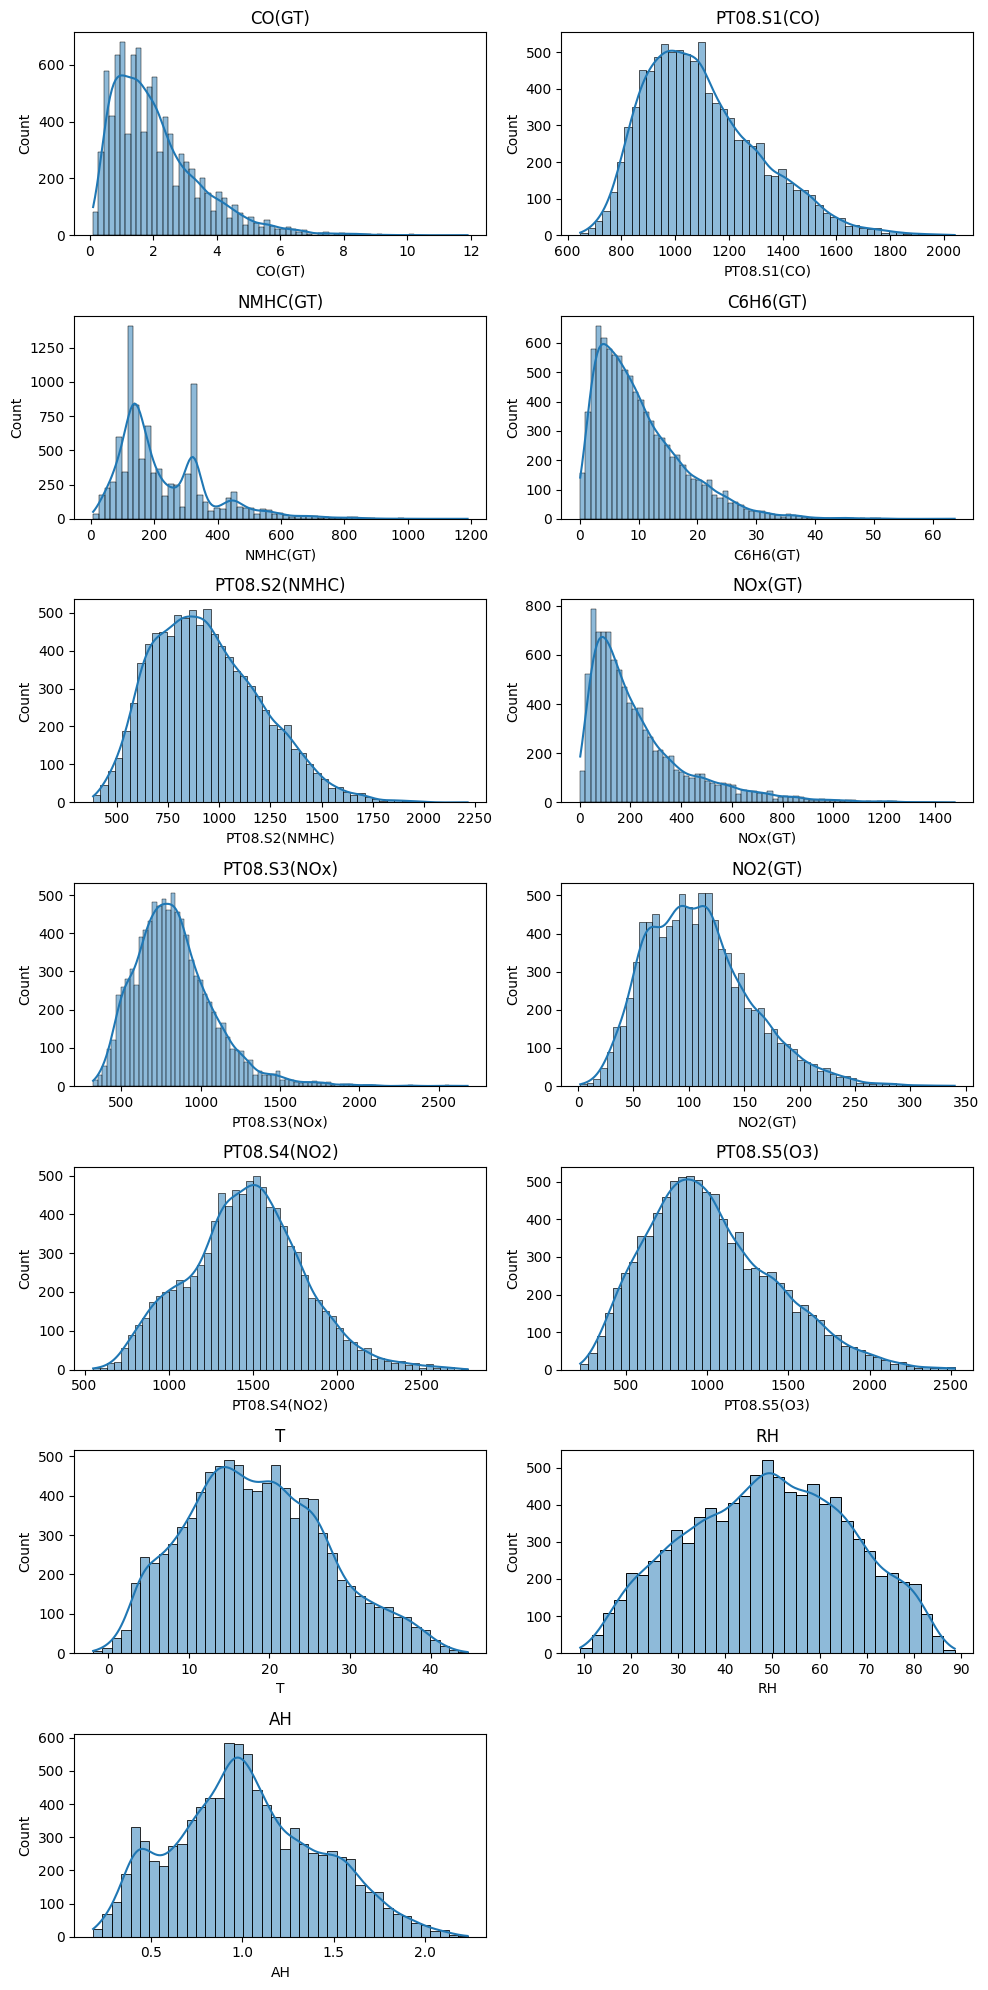

In [7]:

num_cols = data.shape[1]

fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(10, 20))
axs = axs.flatten()

for idx, col in enumerate(data.columns):
    sns.histplot(data[col], ax=axs[idx], kde=True)
    axs[idx].set_title(col)

# Remove any unused subplots
for extra_idx in range(idx + 1, len(axs)):
    fig.delaxes(axs[extra_idx])

plt.tight_layout()
plt.show()

# Density PLOT

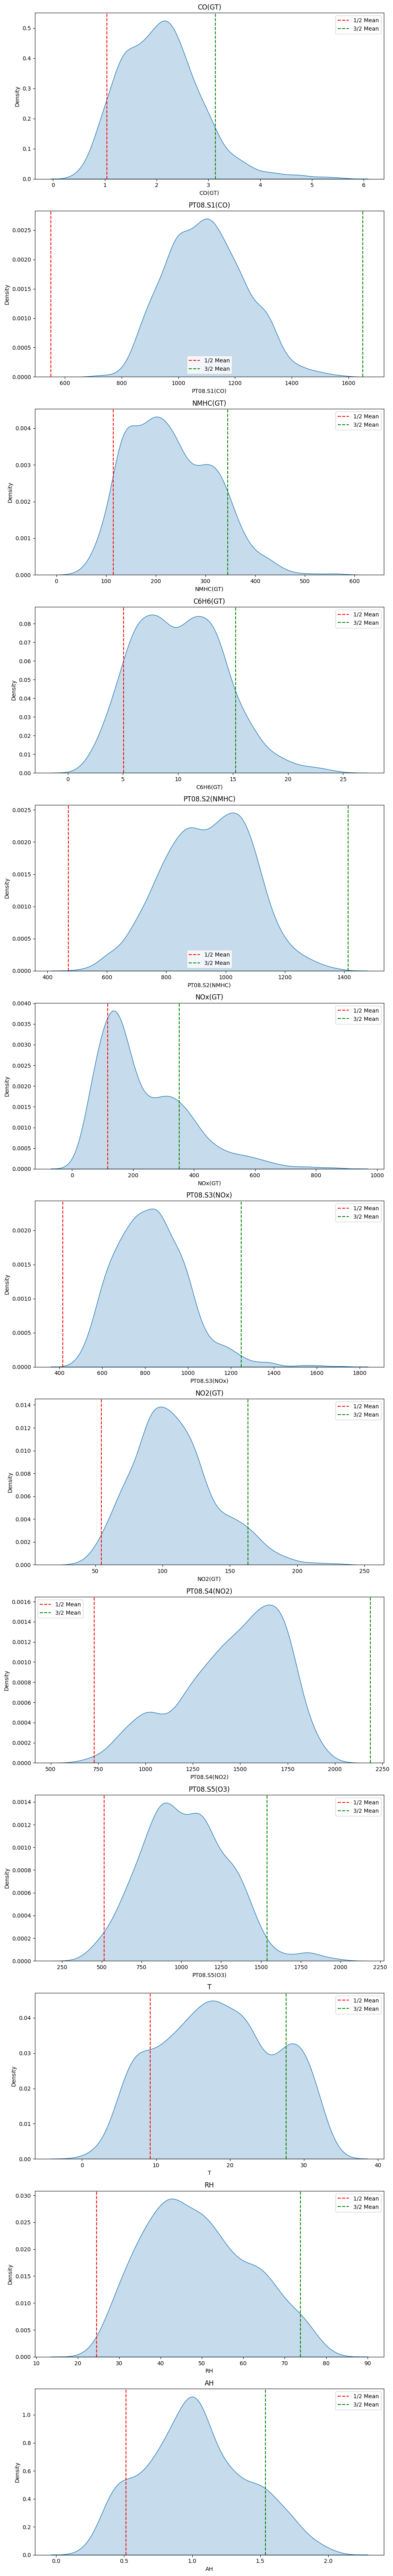

In [8]:
rolling_avg_data = data.rolling(window=24).mean().iloc[::7]

num_cols = rolling_avg_data.shape[1]

fig, axs = plt.subplots(nrows=num_cols, ncols=1, figsize=(10, num_cols * 5))
axs = axs.flatten()

for idx, col in enumerate(rolling_avg_data.columns):
    sns.kdeplot(data=rolling_avg_data, x=col, ax=axs[idx], fill=True)
    axs[idx].set_title(col)
    
    # Calculate the mean of the column
    mean_val = rolling_avg_data[col].mean()
    
    # Add vertical lines at 1/2 of the mean and 3/2 of the mean
    axs[idx].axvline(x=mean_val / 2, color='r', linestyle='--', label='1/2 Mean')
    axs[idx].axvline(x=3 * mean_val / 2, color='g', linestyle='--', label='3/2 Mean')
    axs[idx].legend()

# Remove any unused subplots
for extra_idx in range(idx + 1, len(axs)):
    fig.delaxes(axs[extra_idx])

plt.tight_layout()
plt.show()

# Correletion Matrix

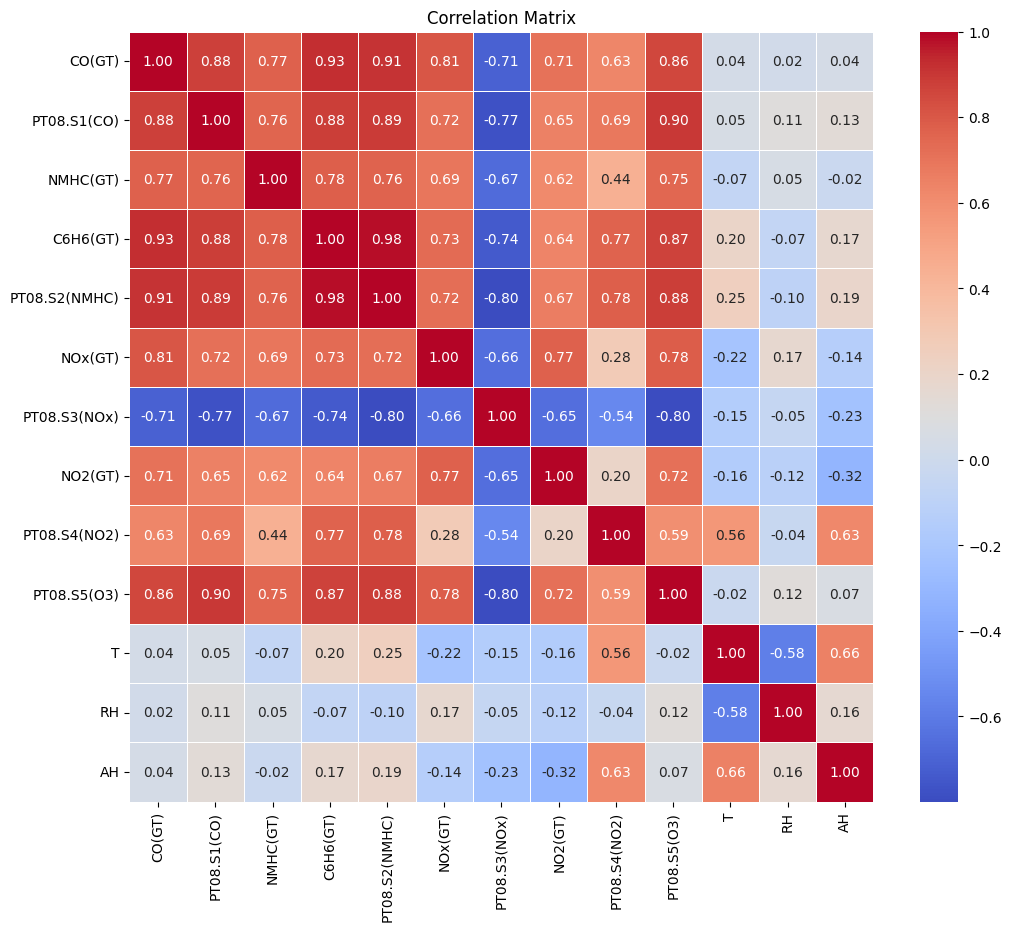

In [9]:
correlation_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Box and Whiskers graph

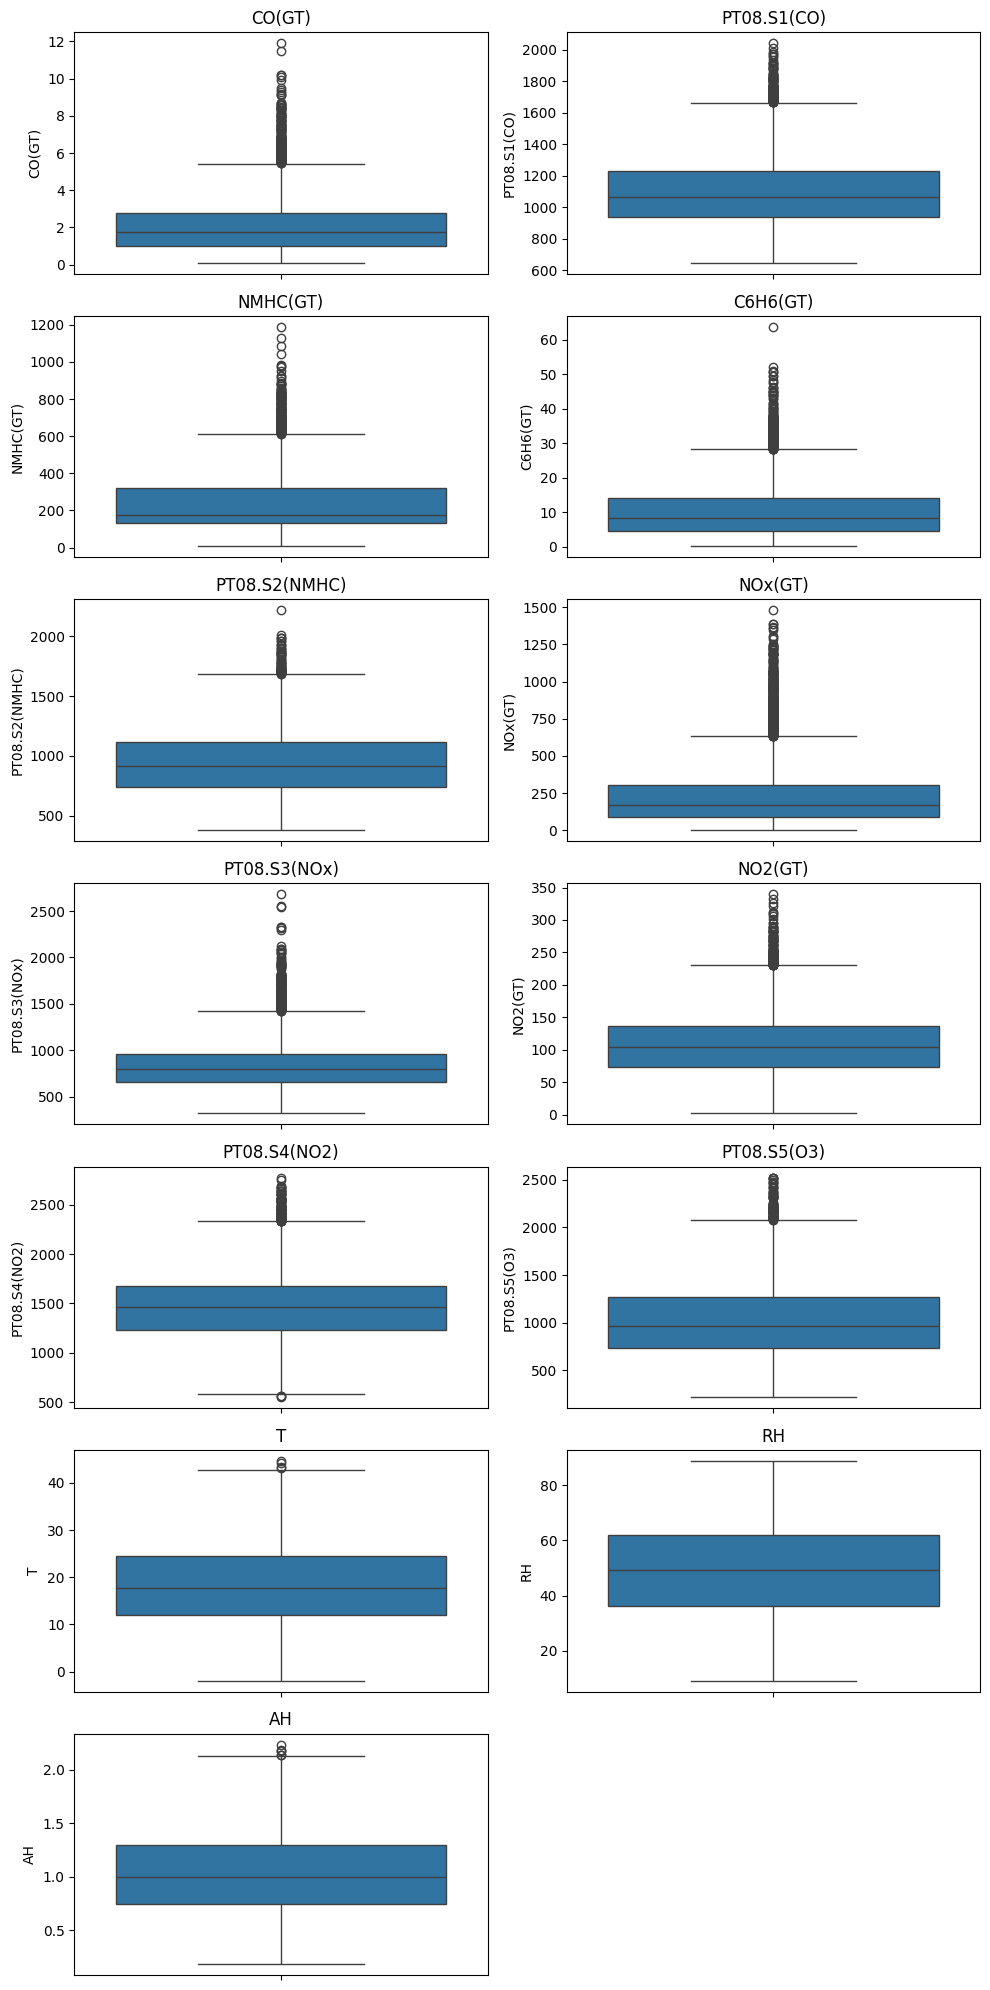

In [10]:
num_cols = data.shape[1]

fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(10, 20))
axs = axs.flatten()

for idx, col in enumerate(data.columns):
    sns.boxplot(data=data[col], ax=axs[idx])
    axs[idx].set_title(col)

# Remove any unused subplots
for extra_idx in range(idx + 1, len(axs)):
    fig.delaxes(axs[extra_idx])

plt.tight_layout()
plt.show()

# Scatter Plot


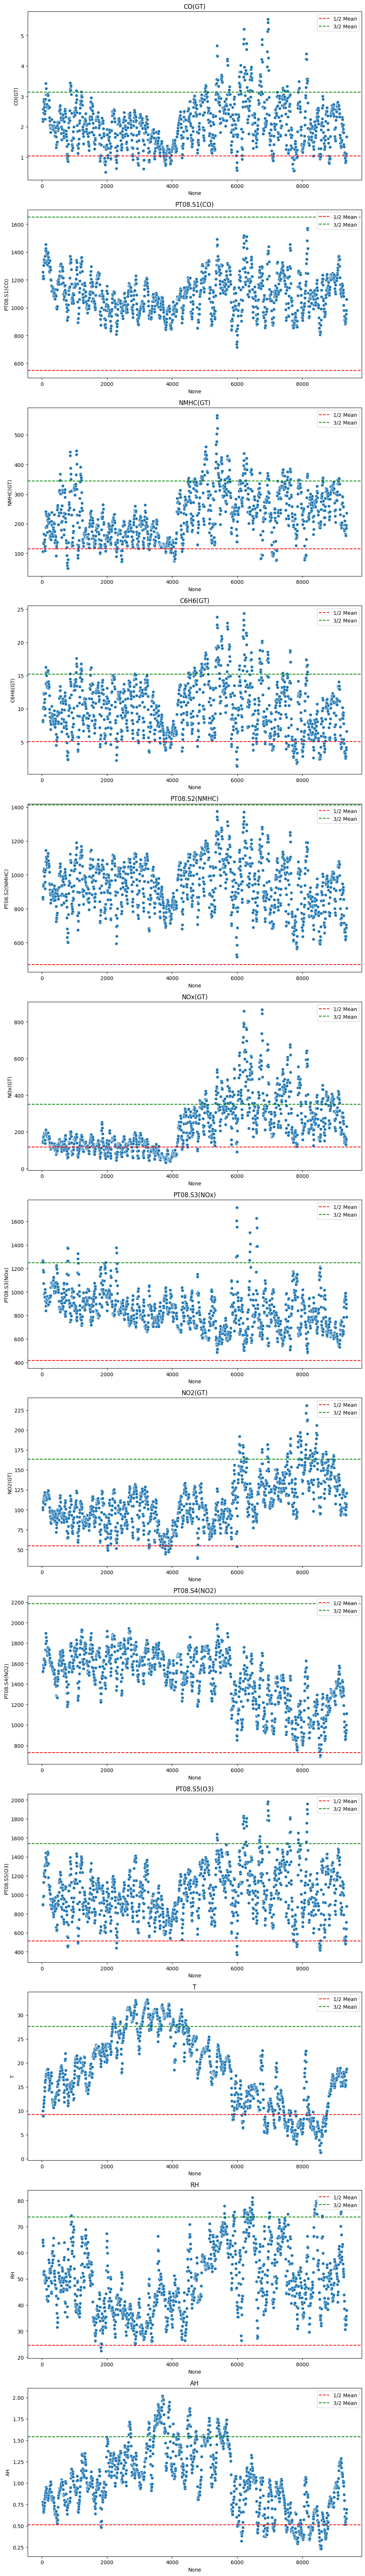

In [11]:
rolling_avg_data = data.rolling(window=24).mean().iloc[::7]

num_cols = rolling_avg_data.shape[1]

fig, axs = plt.subplots(nrows=13, ncols=1, figsize=(10, 70))
axs = axs.flatten()

for idx, col in enumerate(rolling_avg_data.columns):
    sns.scatterplot(data=rolling_avg_data, x=rolling_avg_data.index, y=col, ax=axs[idx])
    axs[idx].set_title(col)
    
    mean_val = rolling_avg_data[col].mean()
    
    axs[idx].axhline(y=mean_val / 2, color='r', linestyle='--', label='1/2 Mean')
    axs[idx].axhline(y=3 * mean_val / 2, color='g', linestyle='--', label='3/2 Mean')
    axs[idx].legend()

# Remove any unused subplots
for extra_idx in range(idx + 1, len(axs)):
    fig.delaxes(axs[extra_idx])

plt.tight_layout()
plt.show()

# Outlier Detection & Handling

In [12]:
import numpy as np
import pandas as pd

skewness_vals = data.skew()

outliers_df = pd.DataFrame()

for col in data.columns:
    if -1 < skewness_vals[col] < 1:
        z_scores = np.abs((data[col] - data[col].mean()) / data[col].std())
        col_outliers = data[z_scores > 3]
    else:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        col_outliers = data[(data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR))]
    
    outliers_df = pd.concat([outliers_df, col_outliers])

outliers_df = outliers_df.drop_duplicates()

cleaned_data = data.drop(outliers_df.index)

print("Data after removing outliers:")
print(cleaned_data)

Data after removing outliers:
      CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0        2.6       1360.0     150.0      11.9         1046.0    166.0   
1        2.0       1292.0     112.0       9.4          955.0    103.0   
2        2.2       1402.0      88.0       9.0          939.0    131.0   
3        2.2       1376.0      80.0       9.2          948.0    172.0   
4        1.6       1272.0      51.0       6.5          836.0    131.0   
...      ...          ...       ...       ...            ...      ...   
9352     3.1       1314.0     323.2      13.5         1101.0    472.0   
9353     2.4       1163.0     323.2      11.4         1027.0    353.0   
9354     2.4       1142.0     323.2      12.4         1063.0    293.0   
9355     2.1       1003.0     305.2       9.5          961.0    235.0   
9356     2.2       1071.0     334.8      11.9         1047.0    265.0   

      PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
0           1056

# Feature Scaling


In [13]:
data_array = data.values
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaled_data = pd.DataFrame(scaler.fit_transform(data_array))
scaled_data.columns = data.columns
scaled_data.index = data.index
data = scaled_data
print(data.describe())

            CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean      0.168401     0.325417     0.188369     0.157950       0.305059   
std       0.120128     0.154128     0.124658     0.116777       0.145136   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       0.076271     0.209620     0.104399     0.069182       0.193774   
50%       0.138983     0.300790     0.142640     0.128931       0.289459   
75%       0.227119     0.417803     0.267513     0.218553       0.400874   
max       1.000000     1.000000     1.000000     1.000000       1.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean      0.157076      0.216435     0.316361      0.407473     0.349717   
std       0.139183      0.107551     0.139293      0.153767     0.171561   
min       0

# Time-Based Feature Engineering


In [14]:
data['datetime'] = pd.to_datetime(data_copy['Date'] + ' ' + data_copy['Time'])

data['Hour'] = data['datetime'].dt.hour
data['Day'] = data['datetime'].dt.dayofweek
data['Month'] = data['datetime'].dt.month

print("Data with extracted time-based features:")
print(data[['datetime', 'Hour', 'Day', 'Month']].head())

print("\n")

print(data[['Hour', 'Day', 'Month']].describe())

Data with extracted time-based features:
             datetime  Hour  Day  Month
0 2004-03-10 18:00:00    18    2      3
1 2004-03-10 19:00:00    19    2      3
2 2004-03-10 20:00:00    20    2      3
3 2004-03-10 21:00:00    21    2      3
4 2004-03-10 22:00:00    22    2      3


              Hour          Day        Month
count  9357.000000  9357.000000  9357.000000
mean     11.498557     3.009939     6.310356
std       6.923182     2.000323     3.438160
min       0.000000     0.000000     1.000000
25%       5.000000     1.000000     3.000000
50%      11.000000     3.000000     6.000000
75%      18.000000     5.000000     9.000000
max      23.000000     6.000000    12.000000
